<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson/blob/master/HandsOn_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

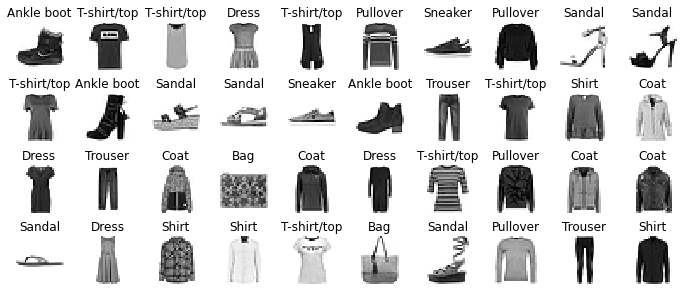

## 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd

# Where to save the figures
PROJECT_ROOT_DIR = "."
SUBFOLDER = "HandsOn_02"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", SUBFOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

RND_SEED = 40

### Información de versiones

In [2]:
tf.__version__

'2.4.2'

In [3]:
keras.__version__

'2.4.0'

### Comprobar si disponemos de una GPU

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

**¡AHORA TÚ!**
- Repasa el notebook de la sesión anterior y averiguar si tenemos que hacer algún otro paso importante con el dataset

## 2. Entrenamiento

### Modelo 'base' de red neuronal

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3726 - accuracy: 0.1289 - val_loss: 2.2509 - val_accuracy: 0.3334
Epoch 2/10
1719/1719 [==============================] - 2s 951us/step - loss: 2.2373 - accuracy: 0.3491 - val_loss: 2.1939 - val_accuracy: 0.5292
Epoch 3/10
1719/1719 [==============================] - 2s 946us/step - loss: 2.1780 - accuracy: 0.5109 - val_loss: 2.1287 - val_accuracy: 0.5314
Epoch 4/10
1719/1719 [==============================] - 2s 950us/step - loss: 2.1108 - accuracy: 0.5573 - val_loss: 2.0508 - val_accuracy: 0.5816
Epoch 5/10
1719/1719 [==============================] - 2s 933us/step - loss: 2.0293 - accuracy: 0.5726 - val_loss: 1.9582 - val_accuracy: 0.5938
Epoch 6/10
1719/1719 [==============================] - 2s 951us/step - loss: 1.9323 - accuracy: 0.5855 - val_loss: 1.8545 - val_accuracy: 0.6058
Epoch 7/10
1719/1719 [==============================] - 2s 939us/step - loss: 1.8298 - accuracy: 0.6025 - val_loss: 1.7470 - v

- Observa que en cada _epoch_ se ejecuta un número de _steps_ de entrenamiento igual a 1719. ¿Sabes explicar qué les ocurre a los parámetros de la red en cada _step_ del entrenamiento?
- El número de _steps_ depende de:
 - El tamaño del _batch_ que se utilice (en Keras se utiliza 32 por defecto).
 - El número de muestras de entrenamiento. 
- Por tanto, podemos calcular el número de _steps_ de la siguiente manera:

In [10]:
import math
batch_size = 32
n_epochs = 30
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
print(n_steps_per_epoch)

1719


**¡AHORA TÚ!**
- ¿Qué tal ha ido el entrenamiento anterior con la función _sigmoid_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy`? 
- ¿Cómo evolucionará el entrenamiento con más _epochs_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy` para 20 _epochs_? 
 - A) Prueba a seguir entrenando ejecutando de nuevo la celda anterior. 
 - B) Vuelve a compilar el modelo para resetear el entrenamiento y cambia esta vez el parámetro `epoch` en la función `fit` a 20. 
- Utiliza código de la práctica anterior, para escribir una función `graph_training(history)` que muestre una gráfica con la evolución del entrenamiento a lo largo de los epochs, e invócala. Por el momento no limites el _eje y_ en el rango 0 ó 1 o, de lo contrario, no se visualizará el `loss` cuando es superior a 1.


Saving figure sigmoid_training


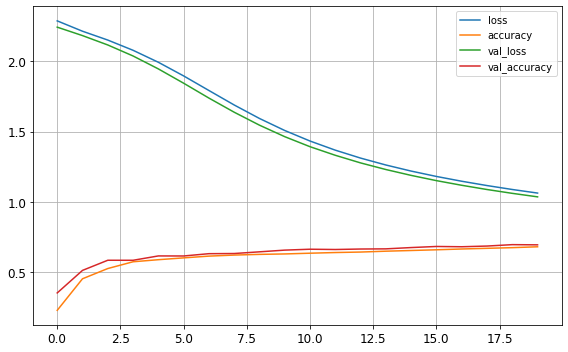

In [15]:
graph_training(history,"sigmoid_training")

### Funciones de activación y learning rate

- Observa, a continuación, las diferentes funciones de activación disponibles en Keras

In [16]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

**¡AHORA TÚ!**
- Prueba a entrenar la red con `tanh` y `relu` para averiguar cómo afecta a la evolución del entrenamiento.
- Compara las gráficas de entrenamiento con el modelo anterior.

**¡AHORA TÚ!**
- Utiliza ahora `relu`como función de activación y prueba valores más pequeños y más grandes de `learning_rate` para averiguar cómo afecta a la evolución del entrenamiento (haz variaciones de un orden de magnitud para ver cambios significativos).
 - ¿Qué ocurre si usamos `learning_rate` 1e-4?
 - ¿Qué ocurre si usamos `learning_rate` 1e-2?
- En las pruebas que vas realizado, ¿hay mucha diferencia entre `loss` y `val_loss`? Si esto ocurriera, ¿qué problema nos estaríamos encontrando?
- Busca una configuración de `epochs` y `learning_rate` en la que se observe que empieza a haber _overfitting_. ¿Qué ocurre en esa situación si disminuimos el `learning_rate`.


### Utilización de _callbacks_ durante el entrenamiento

- Para obtener información extra durante el entrenamiento podemos crear _Callbacks_: funciones que se invocan al finalizar cada _epoch_.

In [20]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("(Loss)val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
val_train_ratio_cb = PrintValTrainRatioCallback()

**¡AHORA TÚ!**
- Prueba a utilizar el _callback_ anterior durante el entrenamiento.
- ¿Cuál es el valor ideal que buscamos para la relación entre `val_loss` y `loss` y qué significan valores más pequeños o más grandes?
- Escribe tu propio _callback_ para obtener información sobre la relación entre `val_accuracy` y `accuracy`.
- ¿Cuál es el valor ideal que buscamos para la relación entre `val_accuracy` y `accuracy` y qué significan valores más pequeños o más grandes?



In [21]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
1719/1719 [==============================] - 2s 995us/step - loss: 0.2039 - accuracy: 0.9279 - val_loss: 0.3085 - val_accuracy: 0.8900
(Loss)val/train: 1.51
Epoch 2/2
1719/1719 [==============================] - 2s 948us/step - loss: 0.2017 - accuracy: 0.9287 - val_loss: 0.3103 - val_accuracy: 0.8898
(Loss)val/train: 1.54


###  Inicialización de pesos y variaciones de funciones de activación tipo ReLU

-  También es posible definir las funciones de activación como capas de la red. Observa cuáles son las capas que ofrecen variaciones de funciones de activación tipo `ReLU`.

In [26]:
[m for m in dir(keras.layers) if "elu" in m.lower()]

['ELU', 'LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

**¡AHORA TÚ!**
- También es posible cambiar la inicialización de los pesos de la red, por ejemplo: `he_normal`.
- Prueba a utilizar como plantilla la red definida a continuación y utiliza como función de activación alguna variación de ReLU para entrenar durante 30 _epochs_.
- Probablemente, para este caso en particular no se observen cambios importantes respecto a entrenar con la función ReLU.

<code> model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.<<TODO>>(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.<<TODO>>(),
    keras.layers.Dense(10, activation="softmax")
    ])
</code>

### Batch normalization

En las clases de teoría vimos cómo la técnica de _Batch Normalization_ consigue entrenamientos más estables. Las ventajas son las siguientes:
- Reduce el problema de desvanecimiento de gradiente.
- Permite usar tasas de aprendizaje mayores.
- Permite una convergencia de la red más rápida.
- Actúa como técnica de regularización.

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

- ¿En qué se basa el funcionamiento de _Batch Normalization_? Observa que al utilizar capas `BatchNormalization` ya no es necesario que las capas intermedias de la red tengan un término de bias, por lo que no lo incluimos en la definición de nuestra red.
- ¿Cómo se explica que el número de parámetros pase de 784 a 3136 en la segunda capa? ¿Cómo se calcula el número de parámetros de las capas _batch_normalization_3_, _batch_normalization_4_ y _batch_normalization_5_?

**¡AHORA TÚ!**
- ¿Cómo evoluciona comparativamente el entrenamiento respecto a lo que obteníamos cuando no usábamos _Batch Normalization_?

Saving figure batchnormalization


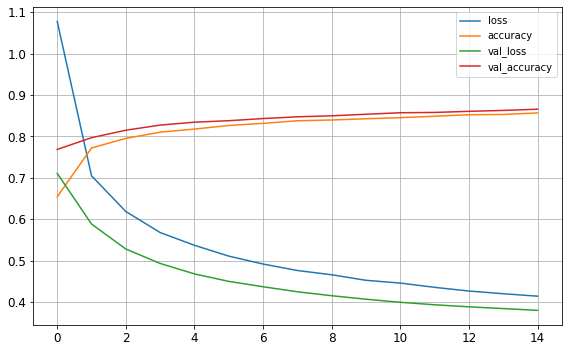

In [33]:
graph_training(history,"batchnormalization")

### Optimizadores

- Hasta ahora solamente hemos utilizado SGD como optimizador. 
- Observa algunas otras opciones disponibles en Keras.

`optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)`

**¡AHORA TÚ!**
- Utilizando la última red que hayas creado, prueba un par de optimizadores (Por ejemplo _RMSProp_ y _AdaMax_) y compara la evolución del entrenamiento a lo largo de unas 15 ó 20 `epochs`, respecto a lo que ocurría con SGD. Utiliza un callback en la función `fit` que te permita responder mejor después a la siguiente pregunta.
- ¿Cuál es el optimizador con el que has conseguido mejor `accuracy` con el set de entrenamiento? ¿Cómo son `val_accuracy` y `val_loss`? ¿Se ha producido _overfitting_ y si es así en torno a qué número de `epoch`?

In [38]:
model.save("mi_dnn_handson02.h5")

# 3. Test

In [40]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Loss y accuracy

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 735us/step - loss: 0.3431 - accuracy: 0.8820


[0.34306854009628296, 0.8820000290870667]

### Matriz de confusión

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
y_true = y_test
y_pred = np.argmax(model.predict(X_test),axis=-1)

In [44]:
print(y_true)
print(y_pred)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [45]:
confnorm = confusion_matrix(y_true, y_pred,normalize='true')

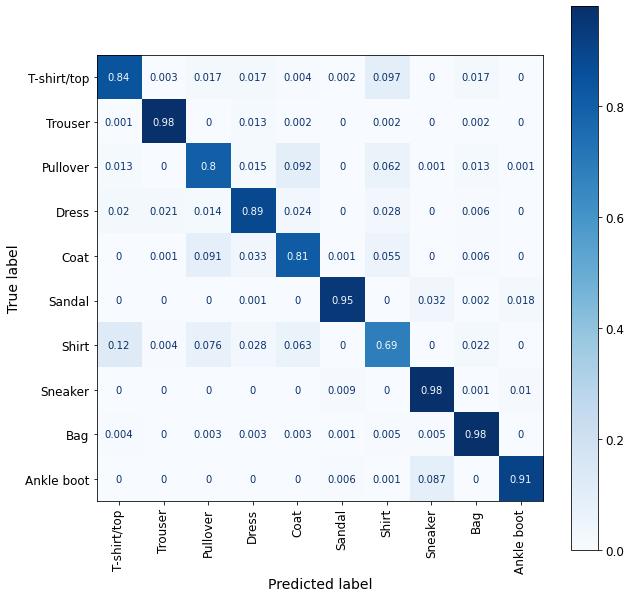

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la diagonal de la matriz de confusión normalizada:
 - Indica cuál ha sido la clase que mejor se ha predicho y el porcentaje de muestras correctamente clasificadas.
 - Indica cuál ha sido la clase que peor se ha predicho y el porcentaje de muestras correctamente clasificadas.


In [48]:
conf = confusion_matrix(y_true, y_pred)

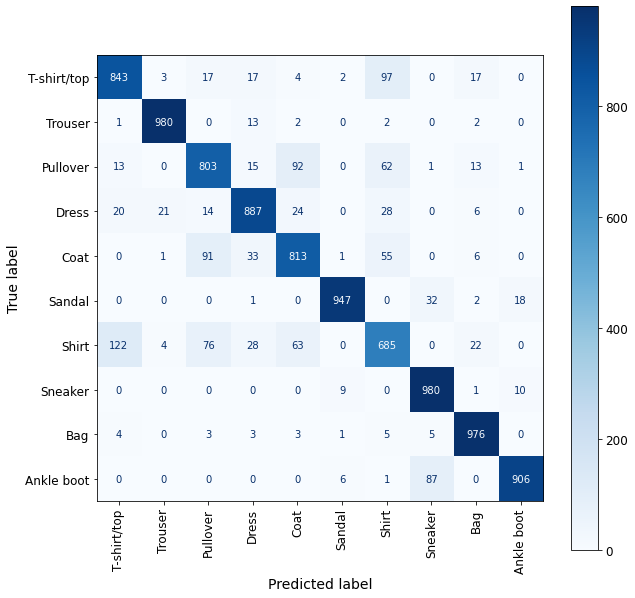

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la matriz de confusión sin normalizar, responde:
 - True Positives (TP): ¿Cuántas muestras de test se han clasificado correctamente para la clase que mejor se ha predicho y cuántas para la clase que peor se ha predicho?
 - False Negatives (FN): Para las muestras que pertenecen a la clase peor predicha, ¿con qué otras clases se han clasificado erróneamente?. Tendrás que buscar en una de las filas de la matriz.
 - False Positives (FP): ¿Las muestras de qué otras clases se han clasificado erroneamente como pertenecientes a dicha clase?. Tendrás que buscar en una de las columnas de la matriz.